## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

**Delete this section from the report, when using this template.** 

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

As avid travelers who are enthusiastic about finding decent accommodations, we all have experience with using Airbnb. In recent years, people have been looking for options other than traditional hotels and beds and breakfasts, and Airbnb’s popularity has surged during a digital age with technology. Therefore, we want explore and analyze the trends that appear within Airbnb’s datasets within Chicago, IL, as it is somewhere close to all of us at Northwestern. Through this analysis, we hope to understand the perspectives of and provide recommendations to Airbnb hosts and Airbnb customers in the city of Chicago.

## Problem statement 

Describe your four questions. Articulate your questions using absolutely no jargon. 

1. What is the correlation between the Proximity from the City and the Price of the listing?
2. Are there associations between Amenities and the Price of the listing?
3. Are there associations between Host Attributes and Booking Satisfaction
4. How are Seasonal trends related to Pricing?

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

Chicago Airbnb Data: http://insideairbnb.com/get-the-data/
- Listings
    - Summary information and metrics for listings in Chicago, collected on 9/12/2023.
- Calendar
    - Quarterly data for the last 12 months, showing each date and statuses (availability, price) of a subset of listings on that date

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

### Primary Stakeholders
#### Hosts
- Main stakeholders
- Pricing strategies, property types, amenities to optimize their listings for better occupancy and revenue

#### Guests
- Pricing trends, the neighborhoods with high occupancy rates, and the types of properties available
- Find the best accommodations in Chicago that meet their needs and budgets

### Secondary Stakeholders
#### Neighbors
- Residential trends and advocacy around rental laws in local neighborhoods.
- Make decisions around the potential impact Airbnbs may have in their neighborhoods

#### City of Chicago
- Generate revenue through more tourism
- Regulators informed of impact of short-term rentals on different neighborhoods
- Influence policies around creating laws to maintain access to residential housing

#### Real Estate Investors
- Investors looking to buy property
- Profitability and other dynamics of short-term rentals in different neighborhoods

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did your analysis require any other kind of data preparation before it was ready to use?

In [3]:
#| echo: false
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Airbnb Listings 
#### Continuous variables

In [4]:
#| echo: false
listings = pd.read_csv('listings_filtered.csv')
continuous_var = listings.iloc[:, np.r_[2:5, 6, 8, 12:19]]
continuous_var.describe()

,latitude,longitude,price,host_response_rate,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,41.897704,-87.666005,181.431881,98.177426,4.763786,4.807012,4.757745,4.849218,4.862881,4.766341,4.683382
std,0.062416,0.044503,206.919906,8.874949,0.373710,0.333659,0.379777,0.326767,0.329447,0.349515,0.405023
min,41.650640,-87.847160,12.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,41.867065,-87.690289,86.000000,100.000000,4.700000,4.760000,4.690000,4.830000,4.860000,4.700000,4.620000
50%,41.901555,-87.662915,132.000000,100.000000,4.860000,4.900000,4.860000,4.940000,4.960000,4.880000,4.780000
75%,41.940460,-87.634164,213.000000,100.000000,4.970000,4.980000,4.980000,5.000000,5.000000,4.970000,4.890000
max,42.022200,-87.536550,7585.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Categorical variables

In [6]:
#| echo: false
categorical_var = listings.iloc[:, np.r_[5, 7, 9:12, 19:40]]
categorical_var

,accommodates,host_response_time,host_is_superhost,host_identity_verified,host_location,wifi_amenities,bathroom_amenities,kitchen_amenities,leisure_amenities,laundry_amenities,...,outdoor_amenities,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities
0,1,within an hour,t,t,"Chicago, IL",1,1,1,1,1,...,0,1,0,1,0,0,1,1,0,1
1,2,within an hour,t,t,"Chicago, IL",1,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
2,4,within an hour,t,t,"Chicago, IL",1,1,1,1,1,...,1,1,1,1,0,1,0,0,0,0
3,3,within a few hours,t,t,"Chicago, IL",1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
4,6,within a few hours,t,t,"Chicago, IL",1,1,1,1,1,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,12,within an hour,f,t,"Chicago, IL",1,1,1,1,1,...,1,1,0,1,0,0,0,1,0,1
5046,3,within a few hours,f,t,"Chicago, IL",1,1,1,1,1,...,0,1,0,1,1,1,1,1,0,0
5047,6,within an hour,t,t,"Chicago, IL",1,1,1,1,1,...,1,1,0,1,0,1,1,1,0,1
5048,2,within a few hours,f,t,"Chicago, IL",1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [7]:
#| echo: false
pd.set_option('display.max_colwidth', None)
categorical_distribution = pd.DataFrame()

for column in categorical_var.columns:
    num_missing = categorical_var[column].isnull().sum()
    num_unique = categorical_var[column].nunique()
    frequencies = categorical_var.groupby(column).size().reset_index(name='Frequency')

    top_frequencies = frequencies.sort_values(by='Frequency', ascending=False).head(5)

    categorical_distribution = categorical_distribution.append({
        'Variable': column,
        'Num_Missing': num_missing,
        'Num_Unique': num_unique,
        'Frequencies of levels': top_frequencies.set_index(column).to_dict()['Frequency']
    }, ignore_index=True)

categorical_distribution.set_index('Variable', inplace=True)

categorical_distribution

,Num_Missing,Num_Unique,Frequencies of levels
Variable,,,
accommodates,0,16,"{2: 1522, 4: 1067, 6: 750, 3: 310, 1: 308}"
host_response_time,0,4,"{'within an hour': 4410, 'within a few hours': 415, 'within a day': 186, 'a few days or more': 39}"
host_is_superhost,0,2,"{'t': 2640, 'f': 2410}"
host_identity_verified,0,2,"{'t': 4588, 'f': 462}"
host_location,0,168,"{'Chicago, IL': 4351, 'New York, NY': 197, 'United States': 55, 'Skokie, IL': 39, 'Springfield, IL': 33}"
wifi_amenities,0,2,"{1: 4998, 0: 52}"
bathroom_amenities,0,2,"{1: 4784, 0: 266}"
kitchen_amenities,0,2,"{1: 4998, 0: 52}"
leisure_amenities,0,2,"{1: 4766, 0: 284}"


#### Airbnb Calendar Data Table

In [15]:
#| echo: false
calendar = pd.read_csv('calendar_year.csv')
calendar.iloc[:, 2:].describe()

,price,year,month
count,2.125760e+06,2.125760e+06,2.125760e+06
mean,2.147295e+02,2.022967e+03,6.526027e+00
std,1.294801e+03,1.783139e-01,3.447852e+00
min,1.000000e+01,2.022000e+03,1.000000e+00
25%,8.700000e+01,2.023000e+03,4.000000e+00
50%,1.370000e+02,2.023000e+03,7.000000e+00
75%,2.150000e+02,2.023000e+03,1.000000e+01
max,9.999800e+04,2.023000e+03,1.200000e+01


### Data Preparation

#### Dataset 1: Airbnb Listings

The listings dataset contains information on Airbnb accommodations listed in Chicago, IL. 

<br />
1. Selecting relevant columns
<br />
<br />
    From the original listings dataset, we decided that we did not need the columns with long strings and paragraph-style descriptions of the listing and neighborhoods contained, or the urls and pictures of the listings. Therefore, we decided to keep only the columns that were relevant for our analyses: 'id', 'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates', 'amenities', 'price', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_identity_verified', 'host_location', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'.
<br />
<br />
2. Missing values
<br />
<br />
    We decided to drop rows with missing values rather than imputing them because from an analytical perspective, it was not likely to get reliable imputations from the methods in our toolkit. This is because there are so many factors and attributes that characterize each listing; for example, it would be inappropriate to impute a missing price value using the median value of neighborhood/location by latitude and longitude because the listings would still differ vastly in price depending on property/accommodation size or amenities offered. Dropping these rows was also justified by how most of the rows that had missing values to begin with tend to be new listings that are yet to be booked/reviewed. This is something we talked through with our mentor.
<br />
<br />
3. Creating categorial variables for amenities (EDA 2)
<br />
<br />
    In the original 'listings' dataset, each value of the 'amenities' column was a list of strings listing out every amenity that was offered at the airbnb property. We cleaned the dataset to make each amenity mentioned a categorical variable represented by the values 0 if not offered by the listing and 1 if offered by the listing. 
<br />
<br />
 This process will be explained in further detail under the EDA 2 section

#### Dataset 2: Airbnb Calendar

The calendar dataset was available in the Airbnb data source as 4 separate csv files divded into each quarter of the year. 
To make the dataset appropriate for use in our analysis, we needed a calendar dataset spanning the entire year.

To obtain this dataset, we found common listings that were included in each quarterly dataset, removed overlapping dates in each of the four quarterly datasets, and finally, concatenated them. This made it possible to track changes in prices for the same set of listings over the entire calendar year, particularly for the purposes of EDA 4.

#### Overall

The steps described above were taken to create the cleaned Listings and Calendar dataset used in our analysis. 

Also,the initial listings dataset had significant price outliers. For example, in the summary statistics, the max value of price was 7585.00. Therefore, as part of our analysis, we filtered for price outliers using Tukey's fences in order to make sure that our visualizations showed trends without being obscured by the skew.
    
Note that rows that were dropped from the 'listings' dataset were also dropped correspondingly from the 'calendar' dataset (using the listing_ids) to streamline our analyses.

Any further modifications made to the final dataset for respective EDA questions will be shown in the next section.

## Exploratory Data Analysis

For each analysis:

What did you do exactly? How did you solve the problem? Why did you think it would be successful? 

What problems did you anticipate? What problems did you encounter? Did the very first thing you tried work? 

Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

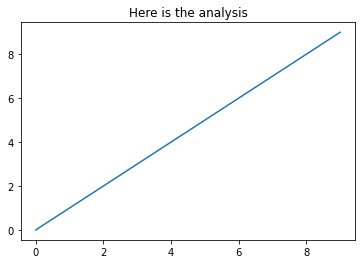

In [10]:
#| echo: false
import matplotlib.pyplot as plt
plt.plot(range(10));

### Analysis 1
*By \<Seoyeon Yoon>*

#### What did you do exactly? How did you solve the problem? Why did you think it would be successful? What problems did you anticipate? What problems did you encounter? Did the very first thing you tried work?

I wanted to investigate whether proximity from the City impacts the price of the listings. This would be a helpful information for the guests as they can make informed decisions based on their priorities (ex. being close to the city paying higher price vs. being budget-conscious). This information can benefit the hosts as well, as it shows the trends of the price within each area and how they should list their prices to have a competitive edge against other listings around them. So, I decided my EDA question to be: "What is the correlation between the Proximity from the City and the Price of the listing?". 

I solved my problem by mainly using the listings dataset. To start with, the dataset had a lot of columns, so we cleaned the dataset as well as condensed it to the columns we needed for this project. In addition to that, I created new columns using exisitng columns such as 'price per person', 'area', etc. 'price per person' was particularly crucial, allowing for a fair comparison of listings catering to different group sizes. 'area' was needed to categorize the lisitngs into respective neighborhoods in Chicago, especially because I am looking into pricing trends in each neighborhoods. Furthermore, recognizing the diversity of the dataset, a variety of visualization methods were strategically employed. Bar charts, scatter plots, and box-and-whisker plots were chosen based on their ability to effectively convey different aspects of the data.

I thought this would be successful as I would be able to show whether proximity is one of the biggest influencing factor of pricing as there are many other factors that are considered when deciding the price. If there is a high correlation between price and proximity, it would mean proximity highly influences the price. If it is low, it means that there are other factors, which means that guests should balance out their priorities seeing what ix offered when staying in that airbnb, not only the proximity to maximize their utility.

One problem I anticipated was how to show the relationships and my analysis using visualizations. As different visualization method serves different purposes, it was helpful to use multiple visualizations for the same sub-investigation to corroborate and better represent the findings (ex. for the first visualization, I used both bar chart and map scatter plot to showcase the same data). So, I overcame the anticipated challenge by using various visualisation methods. This approach not only enhanced the clarity of the findings but also ensured that the visualizations served distinct purposes.

A challenge emerged when attempting to incorporate an additional dataset containing Chicago landmarks. As I realized that these landmarks were historical rather than tourist attractions, I made a change in my approach: instead of using the landmark dataset, I decided to pinpoint one coordinate, Millennium Park, as a representative point for tourist activity/ the core of the city.

Overall, the analysis process was relatively smooth, mostly with what I initially thought of doing working. I believe the analysis process proved to be methodical and adaptable. The combination of data cleaning, variable creation, and a diverse set of visualizations contributed to a nuanced exploration of the correlation between proximity and Airbnb listing prices.

#### Viz 1: Categorize Areas of Listing (Bar chart & Map plot)

/var/folders/2s/l_y675j52kxbwyh54y5ldk400000gn/T/ipykernel_29449/3231400532.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  listings_dropped['area'] = pd.np.select(


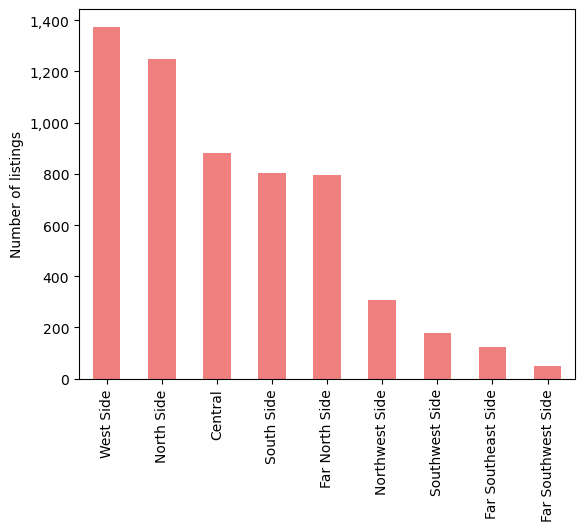

In [12]:
#| echo: false
import pandas as pd
import numpy as np
import seaborn as sns

listings = pd.read_csv('./Datasets/listings_filtered.csv')

#cleaning data and creating columns that are needed
listings_dropped = listings.dropna()
listings_dropped['price per person'] = listings_dropped['price']/listings_dropped['accommodates']

listings_dropped['area'] = pd.np.select(
    [
        listings_dropped['neighbourhood_cleansed'].isin(['Near North Side', 'Loop', 'Near South Side']),
        listings_dropped['neighbourhood_cleansed'].isin(['Ohare', 'Norwood Park', 'Edison Park', 'Jefferson Park', 'Forest Glen', 'North Park', 'Albany Park', 'Lincoln Square', 'Rogers Park', 'West Ridge', 'Edgewater', 'Uptown']),
        listings_dropped['neighbourhood_cleansed'].isin(['Chatham', 'Avalon Park', 'Burnside', 'Roseland', 'West Pullman', 'Pullman', 'Riverdale', 'South Deering', 'Hegewisch', 'East Side', 'South Chicago', 'Calumet Heights']),
        listings_dropped['neighbourhood_cleansed'].isin(['Ashburn', 'Auburn Gresham', 'Washington Heights', 'Beverly', 'Morgan Park', 'Mount Greenwood']),
        listings_dropped['neighbourhood_cleansed'].isin(['North Center', 'Lake View', 'Lincoln Park', 'Logan Square', 'Avondale']),
        listings_dropped['neighbourhood_cleansed'].isin(['Dunning', 'Portage Park', 'Irving Park', 'Belmont Cragin', 'Hermosa', 'Montclare']),
        listings_dropped['neighbourhood_cleansed'].isin(['Bridgeport', 'Armour Square', 'Fuller Park', 'Douglas', 'Grand Boulevard', 'Oakland', 'Kenwood', 'Hyde Park', 'Woodlawn', 'South Shore', 'Greater Grand Crossing', 'Washington Park']),
        listings_dropped['neighbourhood_cleansed'].isin(['Mckinley Park', 'New City', 'Englewood', 'West Englewood', 'Chicago Lawn', 'West Lawn', 'Clearing', 'West Elsdon', 'Gage Park', 'Garfield Ridge', 'Archer Heights', 'Brighton Park']),
        listings_dropped['neighbourhood_cleansed'].isin(['Austin', 'Humboldt Park', 'West Garfield Park', 'East Garfield Park', 'West Town', 'Near West Side', 'North Lawndale', 'South Lawndale', 'Lower West Side'])
    ],
    [
        'Central',
        'Far North Side',
        'Far Southeast Side',
        'Far Southwest Side',
        'North Side',
        'Northwest Side',
        'South Side',
        'Southwest Side',
        'West Side'
    ],
    default='Other')

ax = listings_dropped['area'].value_counts()[:25].plot.bar(ylabel = 'Number of listings', color='lightcoral')
ax.yaxis.set_major_formatter('{x:,.0f}')

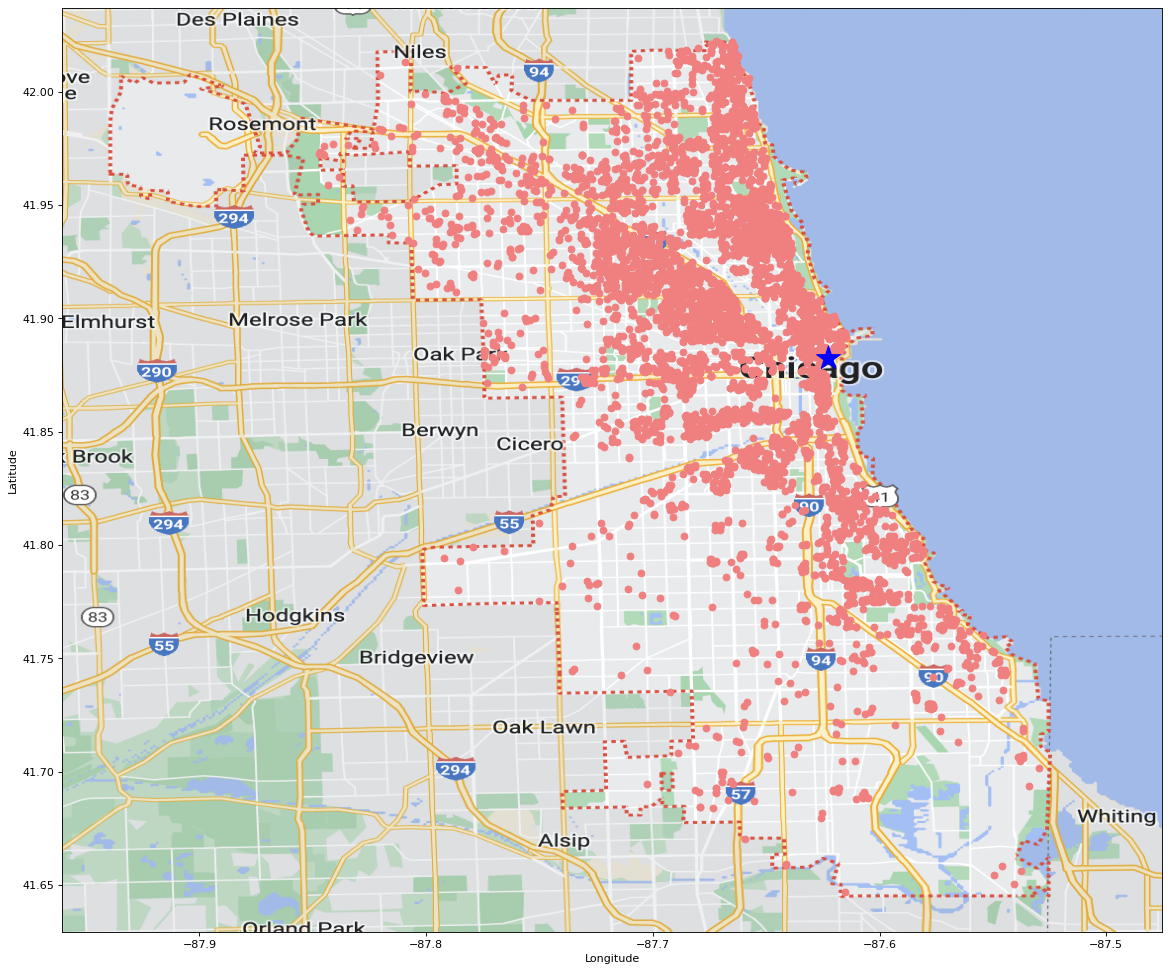

In [ ]:
#| echo: false
import matplotlib.pyplot as plt

# Coordinates of listings
coordinates_listing = listings_dropped.iloc[:,5:7].to_numpy()

#Millennium Park Coordinates
mp_coord = np.array([41.8826, -87.6226])

def listing_viz():
    img = plt.imread("Chicago_Map.png")
    fig, ax = plt.subplots(figsize=(10, 100),dpi=80)
    fig.set_size_inches(20, 15)
    ax.imshow(img,extent=[-87.960529, -87.475380, 41.629367, 42.036972])
    plt.scatter(y = coordinates_listing[:,0], x = coordinates_listing[:,1], marker='o', color='lightcoral', zorder = 1)
    plt.scatter(y = mp_coord[0],  x = mp_coord[1], marker='*', color = 'blue', s= 500, zorder = 2)
    plt.xlim(-87.960529, -87.475380)
    plt.ylim(41.629367, 42.036972)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
listing_viz()

First I binned all the lisitngs in the dataset into respecitve neighborhoods by creating a column 'area'. Then, I used two visualization methods using the 'area' column. I first created the bar chart, but realized that although it shows the categorization and how much listings each neighborhood has, it does not show visually how they are distributed over the Chicago land. Therefore, I decided to make a scatterplot overlaid on the Chicago map to better visualize the geographical distribution.

It shows that the majority of the listings are located on the Central/ North Side areas of Chicago. And the same can be deduced by seeing the scatter plot. Listings are less populated as it becomes farther away from the city area and as it goes to the South areas.

#### Viz 2: Listings in City vs. Residential Areas Price (Outlier-adjusted) 

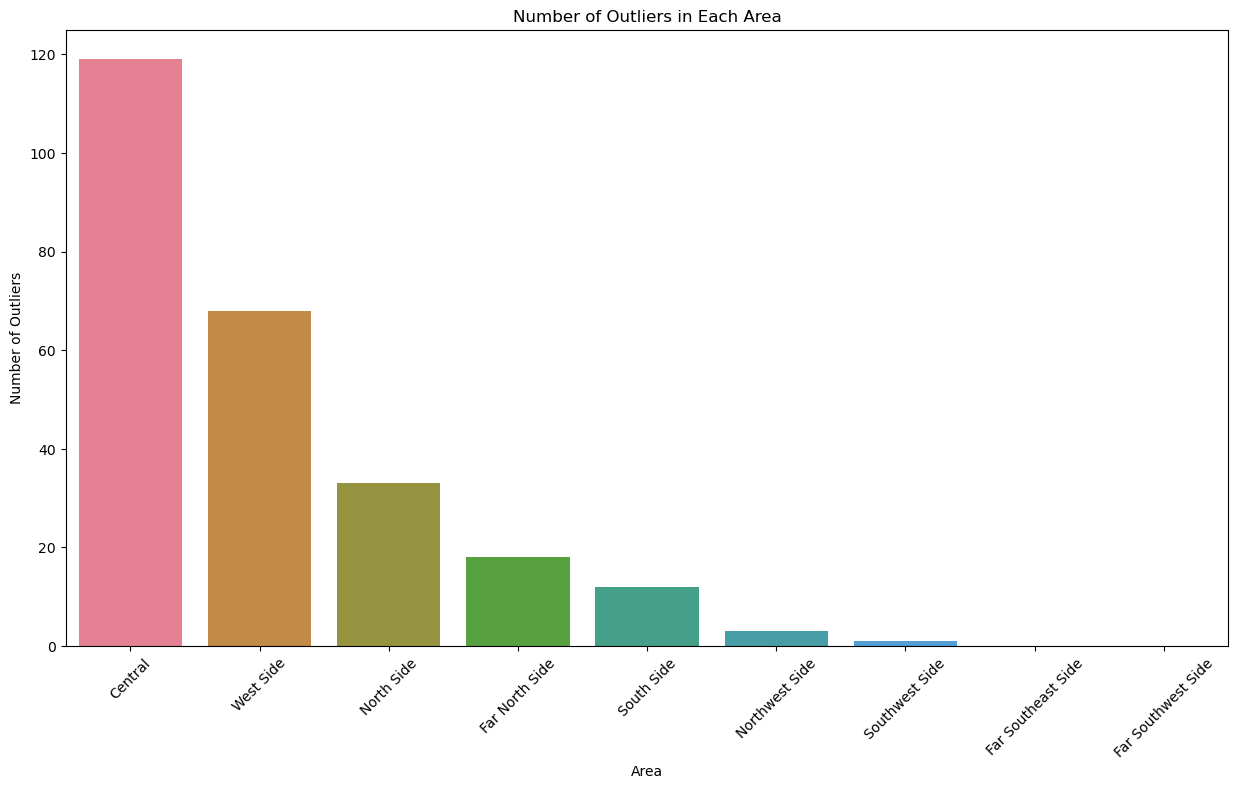

In [14]:
#| echo: false
# Calculate outliers using Tukey's method
def tukey_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

# Identify outliers and count them for each area
listings_dropped['outliers'] = tukey_outliers(listings_dropped['price per person'])

outliers_by_area = listings_dropped.groupby('area')['outliers'].sum().reset_index()
outliers_by_area = outliers_by_area.sort_values(by='outliers', ascending=False)

# Create a bar plot for the number of outliers in each area
plt.figure(figsize=(15, 8))
sns.barplot(x='area', y='outliers', data=outliers_by_area, palette='husl')
plt.title('Number of Outliers in Each Area')
plt.xlabel('Area')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.show()

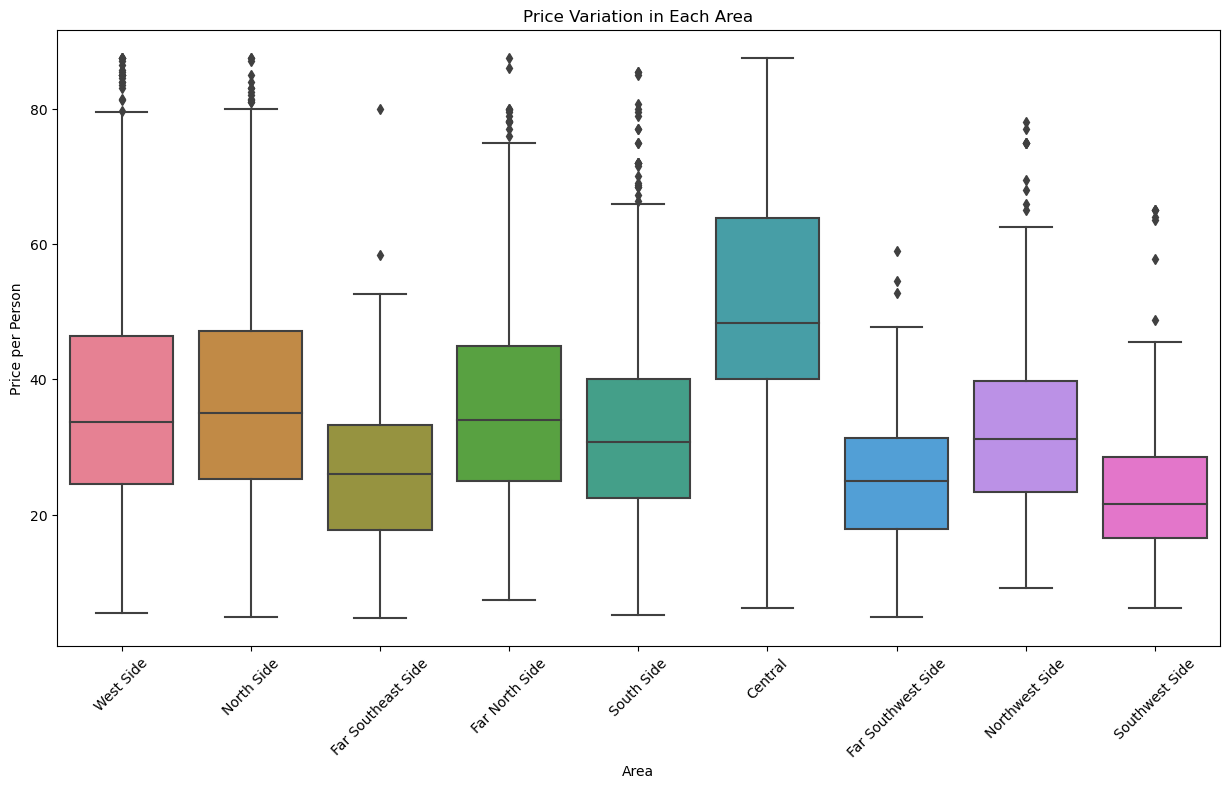

In [25]:
#| echo: false
wo_outliers = listings_dropped[listings_dropped['outliers'] == False]

# Create a box plot for price in each area
plt.figure(figsize=(15, 8))
sns.boxplot(x='area', y='price per person', data=wo_outliers, palette='husl')
plt.title('Price Variation in Each Area')
plt.xlabel('Area')
plt.ylabel('Price per Person')
plt.xticks(rotation=45)
plt.show()

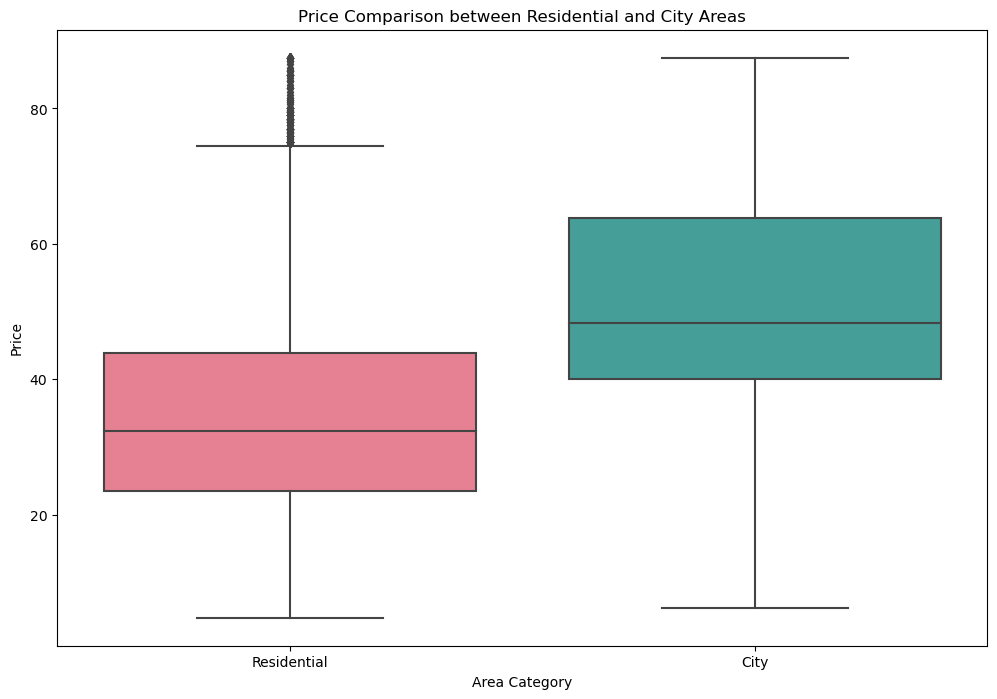

Percentage Difference in Price per Person for City compared to Overall Median: 45.09%
Percentage Difference in Price per Person for Residential compared to Overall Median: -7.48%


In [36]:
#| echo: false
# Create a new column 'area_category' to distinguish residential and city areas
listings_dropped['area_category'] = listings_dropped['area'].apply(lambda x: 'City' if x == 'Central' else 'Residential')
wo_outliers = listings_dropped[listings_dropped['outliers'] == False]

# Create a box plot for price comparison between residential and city areas
plt.figure(figsize=(12, 8))
sns.boxplot(x='area_category', y='price per person', data=wo_outliers, palette='husl')
plt.title('Price Comparison between Residential and City Areas')
plt.xlabel('Area Category')
plt.ylabel('Price')
plt.show()

# Calculate the median price per person for City and Residential areas
median_price_city = listings_dropped[listings_dropped['area_category'] == 'City']['price per person'].median()
median_price_residential = listings_dropped[listings_dropped['area_category'] == 'Residential']['price per person'].median()

# Calculate the median price for all listings
median_price_all = listings_dropped['price per person'].median()

# Calculate the percentage change in price per person for City and Residential areas compared to the median
percentage_change_city = ((median_price_city - median_price_all) / median_price_all) * 100
percentage_change_residential = ((median_price_residential - median_price_all) / median_price_all) * 100

print(f"Percentage Difference in Price per Person for City compared to Overall Median: {percentage_change_city:.2f}%")
print(f"Percentage Difference in Price per Person for Residential compared to Overall Median: {percentage_change_residential:.2f}%")

Here, I identified the outlying prices by using Tukey's fence method. Shown from the bar chart, Central area has the most outlying prices, suggesting premium on locations near the city's core. This may because of the proximity to tourist attractions, expensive house pricings, etc. Also, it is known that the North half of Chicago is wealthier than the South half, which may be one reason why north area listings' price to be more expensive.

After dropping all lisitngs with outlying prices, I created a box and whisker plot. The first box and whisker plot shows the price distribution for lisitngs grouped by each areas. Here, it is apparent that the Central area has a higher median and 25th, 75th percentile, as well as a wider price range. The general north area has a higher median price and wider range than the general south area. To make the comparison more obvious, I binned all the residential areas into a category called 'Residential' by creating a new column called 'area_category'. Although this may be less accurate as it is the average of all the areas except the Central area (City), it clearly shows the trend that lisitngs in the city have a higher overall price compared to the residential areas. The City having a wider IQR range shows that the central area has a more diverse range of prices, potentially with a mix of affordable and premium listings.

I also calculated the percentage difference in price per person between city/ residential area and the overall median price per person to quanitfy the the trend. Here, we realize that city listings tend to be 45% more expensive compared to the overall median price and that the residential listings tend to be 7% cheaper than the overall median price.

#### Viz 3: Euclidean Distance

Pearson Correlation Coefficient for City: -0.318116419601889
Pearson Correlation Coefficient for Residential: -0.17708876541967286


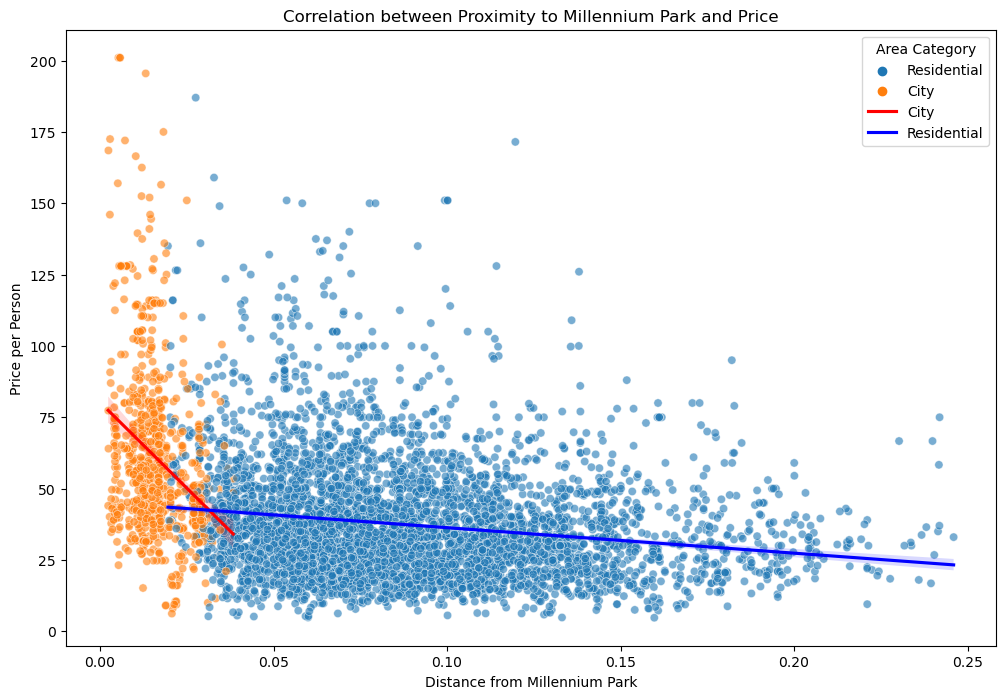

In [37]:
#| echo: false
distance_from_mp = np.sqrt(np.sum((mp_coord-coordinates_listing)**2,axis=1))

distance_from_mp[distance_from_mp==0]=9999
closest_coord_index = np.argmin(distance_from_mp)
closest_coord_index


closest_coord = coordinates_listing[closest_coord_index,:]
closest_listing = listings_dropped.iloc[closest_coord_index, :]
closest_listing


farthest_coord_index = np.argmax(distance_from_mp)
farthest_coord = coordinates_listing[farthest_coord_index, :]
farthest_listing = listings_dropped.iloc[farthest_coord_index, :]

coordinates_listing[168,:]

listing_coord = np.array((closest_coord, farthest_coord))

# add new column of the distance between listings and the Millennium Park
distance_from_mp = np.sqrt(np.sum((mp_coord - np.array(listings_dropped[['latitude', 'longitude']])) ** 2, axis=1))
listings_dropped['distance_from_mp'] = distance_from_mp

#scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='distance_from_mp', y='price per person', hue='area_category', data=listings_dropped, alpha=0.6)

#Regression line for City
sns.regplot(x='distance_from_mp', y='price per person', data=listings_dropped[listings_dropped['area_category'] == 'City'], scatter=False, color='red', label='City')

#Regression line for Residential
sns.regplot(x='distance_from_mp', y='price per person', data=listings_dropped[listings_dropped['area_category'] == 'Residential'], scatter=False, color='blue', label='Residential')

plt.title('Correlation between Proximity to Millennium Park and Price')
plt.xlabel('Distance from Millennium Park')
plt.ylabel('Price per Person')
plt.legend(title='Area Category', loc='upper right')

#Pearson coeff for City
correlation_city = listings_dropped[listings_dropped['area_category'] == 'City']['distance_from_mp'].corr(listings_dropped[listings_dropped['area_category'] == 'City']['price per person'])
print(f"Pearson Correlation Coefficient for City: {correlation_city}")

#Pearson coeff for Residential
correlation_residential = listings_dropped[listings_dropped['area_category'] == 'Residential']['distance_from_mp'].corr(listings_dropped[listings_dropped['area_category'] == 'Residential']['price per person'])
print(f"Pearson Correlation Coefficient for Residential: {correlation_residential}")

plt.show()

In this scatterplot, I first calculated the euclidean distance of each of the listings from the Millennium Park. The x-axis is the distance from the Millennium Park, and the y-axis is the price per person for each lisitngs. I also included a trendline using regplot to visualize the correlation between the two variables.

To dive deeper into the Pearson correlation coefficients, both of the area categories have a negative correlation, which means that as the distance from the Millennium Park increases, the price per person tends to decrease. We can guage the strength of the correlation by seeing the absolute values of the correlation coefficient. City has a weak to moderate magnitude (-0.3181), which we can conclude that it has a discernable downward trend. The residential area has a weak magnitude (-0.1771). Therefore, we can conclude that though correlation exists, since they are not strong, distance to the city is a factor, but not the sole and most important factor that determines the price of the listing. There may be other factors that are incorporated in the process of deciding the price. This ultimately answers and concludes my EDA question.

#### Viz 4: Seasonal Booking Rate within respective areas 

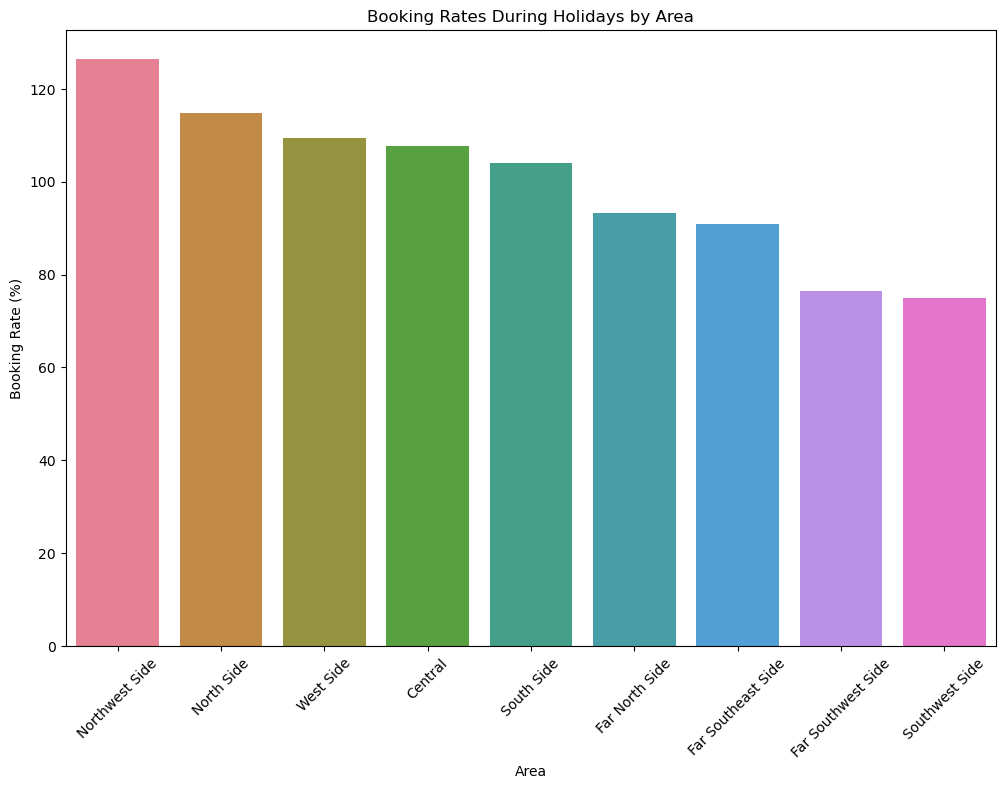

In [34]:
#| echo: false
calendar = pd.read_csv('./Datasets/calendar_year.csv')
one_year_ago = pd.Timestamp('2023-09-12') - pd.DateOffset(years=1)
calendar['date'] = pd.to_datetime(calendar['date'])

holidays = {
    'Easter': ['04-04', '04-05', '04-06'],
    'Summer Vacation': ['06-01', '08-31'],
    'Thanksgiving': ['11-25', '11-26', '11-27'],
    'Christmas': ['12-24', '12-25', '12-26']
}

holiday_dates = [date for dates in holidays.values() for date in dates]
holiday_data = calendar[(calendar['date'].dt.strftime('%m-%d').isin(holiday_dates)) & (calendar['available'] == 't')]

holiday_data_with_area = pd.merge(holiday_data, listings_dropped[['listing_id', 'area']], left_on='listing_id', right_on='listing_id', how='inner')

booking_rates_holidays = 100 * (holiday_data_with_area.groupby(['area']).size()/3) / listings_dropped.groupby('area').size()

booking_rates_holidays_sorted = booking_rates_holidays.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=booking_rates_holidays_sorted.index, y=booking_rates_holidays_sorted.values, palette='husl')
plt.title('Booking Rates During Holidays by Area')
plt.xlabel('Area')
plt.ylabel('Booking Rate (%)')
plt.xticks(rotation=45)
plt.show()

This plot was not included in the presentation for the sake of time and flow of the presentation. However, I would like to include this in the report as this visualization also gives valuable information that may be useful. Here, I used the calendar dataset as well as the lisitngs dataset. I joined the two dataset by merging them on the 'listing_id' column where both dataset shares. I wanted to know which areas are booked the most during holiday seasons, which consists of Easter, Summer Vacation, Thanksgiving, and Christmas, where people travel a lot to visit friends and families. The bar plot shows that people use the lisitngs in the North/West/Northwest sides and Central areas the most in these seasons.

### Analysis 2
*By Christine Kim*

#### What did you do exactly? How did you solve the problem? Why did you think it would be successful? What problems did you anticipate? What problems did you encounter? Did the very first thing you tried work?

I was interested in the disparities in amenity offerings between different airbnbs. Especially from the perspectives of the hosts, I wanted to solve the problem of what amenities they should offer depending their target price to charge for the listing or to gain a higher revenue. Therefore, this section revolves around the question: Are there associations between Amenities and the Price of the listing? 

I thought that analyzing the data around this EDA question would be able to solve the hosts problems by offering insight into which amenities are the most/least common or associated with higher/lower prices. Ultimately, from the standpoint of hosts who want to be able to charge higher prices on their listings to gain more revenue, this analysis could form valuable insights into which amenities hosts should focus on offering.

A major challenge that I anticipated and encountered was the data cleaning process for the amenities column in the listings dataset. In the original 'listings' dataset, each value of the 'amenities' column was a list of strings listing out every amenity that was offered at the airbnb property. I cleaned the dataset to make each amenity mentioned a categorical variable represented by the values 0 if not offered by the listing and 1 if offered by the listing. However, a problem that I faced was that doing this resulted in 2428 columns of amenity categorical variables. This was because variations in spelling or description of the same amenity led to the creation of multiple variables. For example, "body wash" or "body soap" or "shower gel" are three variations of the same amenity. 

To overcome this challenge, I tried multiple methods such as renaming columns that contained the same word as that word (e.g. "Pantene shampoo" and "Dove shampoo" renamed as "shampoo"), but even this resulted in an exorbitant number of amenity categorical variables that were unable to be visually represented in a clear way. 
Finally, the method that I found worked best was to use keywords to categorize each amenity into a category. By this method, I was able to categorize most amenities, excluding those that were too obscure and were only offered by less than 1% of all the listings, into 21 distinct amenity categories, and correspondingly, 21 amenity categorical variables columns in the cleaned dataset. 

These amenity categories represent descriptions as follows:
   - 'wifi_amenities': wifi
   - 'bathroom_amenities': amenities including shampoo, body wash, conditioner, and hair dryer
   - 'kitchen_amenities': amenities including refrigerator, microwave, oven, stove, dishwasher, kettle, silverware, etc.
   - 'leisure_amenities': amenities including tv channels, games, books, sound systems, etc.
   - 'laundry_amenities': amenities including washers, dryers, irons, etc.
   - 'storage_amenities': amenities including storage space such as closets and dresssers
   - 'transporation_amenities': amenities including parking spaces, garage, ev chargers
   - 'environment_amenities': amenities including heaters, air conditioning, fans, etc.
   - 'safety_amenities': amenities including first aid kits, fire alarms, fire extinguishers, security cameras, etc.
   - 'exercise_amenities': amenities including gyms, treadmills, weights, yoga mats, etc.
   - 'views_amenities': amenities including different views and lake/beach access
   - 'outdoor_amenities': amenities including patios, yards, hammocks, sun loungers, etc.
   - 'luxury_amenities': amenities including hot tubs, pools, sauna, rooftops, etc.
   - 'family_amenities': amenities including children/baby-related equipment such as cribs, high chairs, changing tables, etc.
   - 'bedroom_amenities': amenities including blankets, pillows, bedlinens
   - 'pet_amenities': allowing pets
   - 'convenience_amenities': amenities including self check-ins, luggage services, and elevators
   - 'cleaning_amenities': amenities including cleaning products and trash
   - 'service_amenities': amenities including cleaning services, breakfast included, building staff access
   - 'smoking_amenities': allowing smoking
   - 'work_amenities': amenities including workspace/desks  


Given the cleaned data I tried to analyze my question: Are there associations between Amenities and the Price of the listing?

I first looked at the variety of amenities offered at an accommodation against its listing price. By intuition, my hypothesis was that offering a greater variety of amenities might be associated with higher pricces, since these listings would attract customers who are looking for better equipped airbnbs despite a higher price per night. I anticipated that it would be hard to see trends across over 5000 listings; thus, I decided to bin the listings into "High prices" and "Low prices" categories, which respresented listings that charged above the median price/night and listings that charged below the median price/night, respectively. Also, since there are 21 different amenity categories, I decided to focus less the specific amenity categories and more on the number of amenity categories offered, for the simplicity and readability of my first visualization, as well as to capture the distinct trend associated with offering a larger variety of amenities.

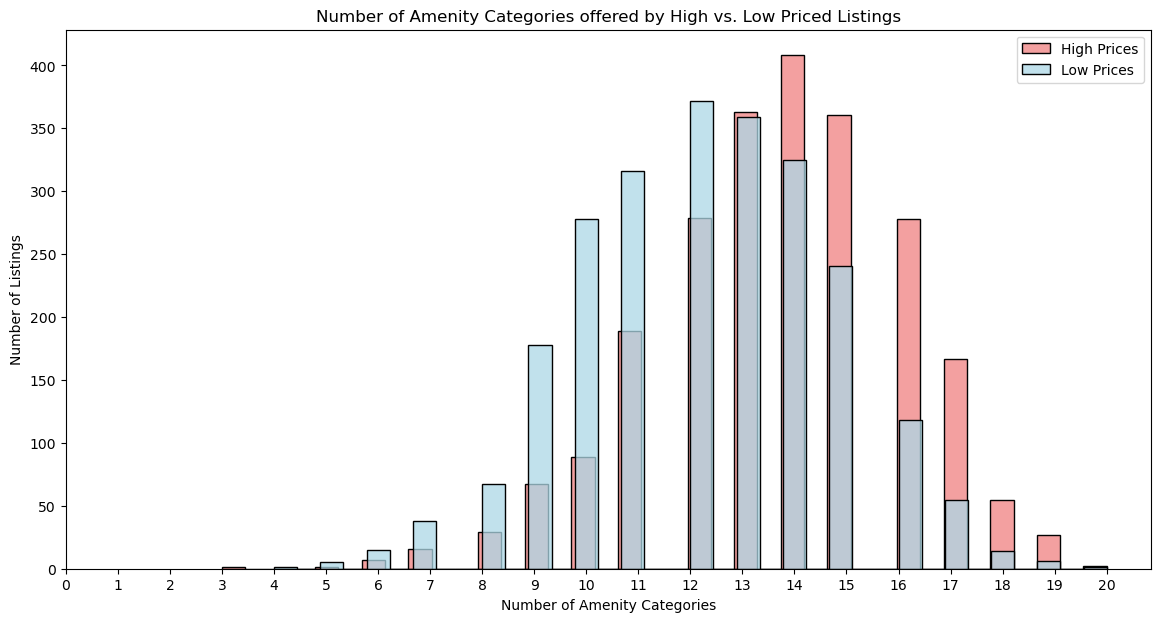

In [88]:
#| echo: false
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
listings = pd.read_csv('listings_filtered.csv')

# Removing price outliers
q1 = np.percentile(listings['price'],25)
q3 = np.percentile(listings['price'],75)
intQ_range = q3-q1

#Tukey's fences
Lower_fence = q1 - 1.5*intQ_range
Upper_fence = q3 + 1.5*intQ_range

Outlying_obs = listings[(listings.price<Lower_fence) | (listings.price>Upper_fence)]
Outlying_obs

listings_nooutlier = listings.drop(Outlying_obs.index)
listings_nooutlier.describe()

median_price_threshold = listings_nooutlier['price'].quantile(0.5)

listings_nooutlier['amenity_count'] = listings_nooutlier.iloc[:, listings_nooutlier.columns.get_loc('wifi_amenities'):listings_nooutlier.columns.get_loc('work_amenities') + 1].sum(axis=1)

# Bin into high and low prices
high_prices = listings_nooutlier[listings_nooutlier['price'] > median_price_threshold]['amenity_count']
low_prices = listings_nooutlier[listings_nooutlier['price'] <= median_price_threshold]['amenity_count']

plt.figure(figsize=(14, 7))
ax1 = sns.histplot(high_prices, color="lightcoral", label='High Prices', kde=False)
ax2 = sns.histplot(low_prices, color="lightblue", label='Low Prices', kde=False)
plt.xlabel('Number of Amenity Categories')
plt.ylabel('Number of Listings')
ax1.set_xticks(np.arange(0,21,1))
plt.title('Number of Amenity Categories offered by High vs. Low Priced Listings')
plt.legend()
plt.show()

I found a distinct association from the plot which showed that, as the number of distinct amenity categories offered increased, so do the number of listings priced above the median relative to the number of listings priced below the median. More specifically, the plot shows that a greater proportion of listings that offer 13 or more different amenity cateogires are associated with higher prices than with lower prices, with the greatest relative difference at 16 amenity categories. The result was somewhat surprising to me as the variety of amenity categories offered tended to be greater than I expected.

In my first plot, I show the association between the variety of amenities offered and the price category and it seems that offering up to 12 different amenities categories is more prevalent in listings below the median price. This result prompted the question around specific amenity categories, and I wanted to distinguish which amenity cateogires are the ones that matter. Thus, in my second plot, I show the prevalence of each amenity category across listings in the dataset. I thought that this would help me discern those amenity categories offered across most listings regardless of price against the more selectively offered amenity categories.

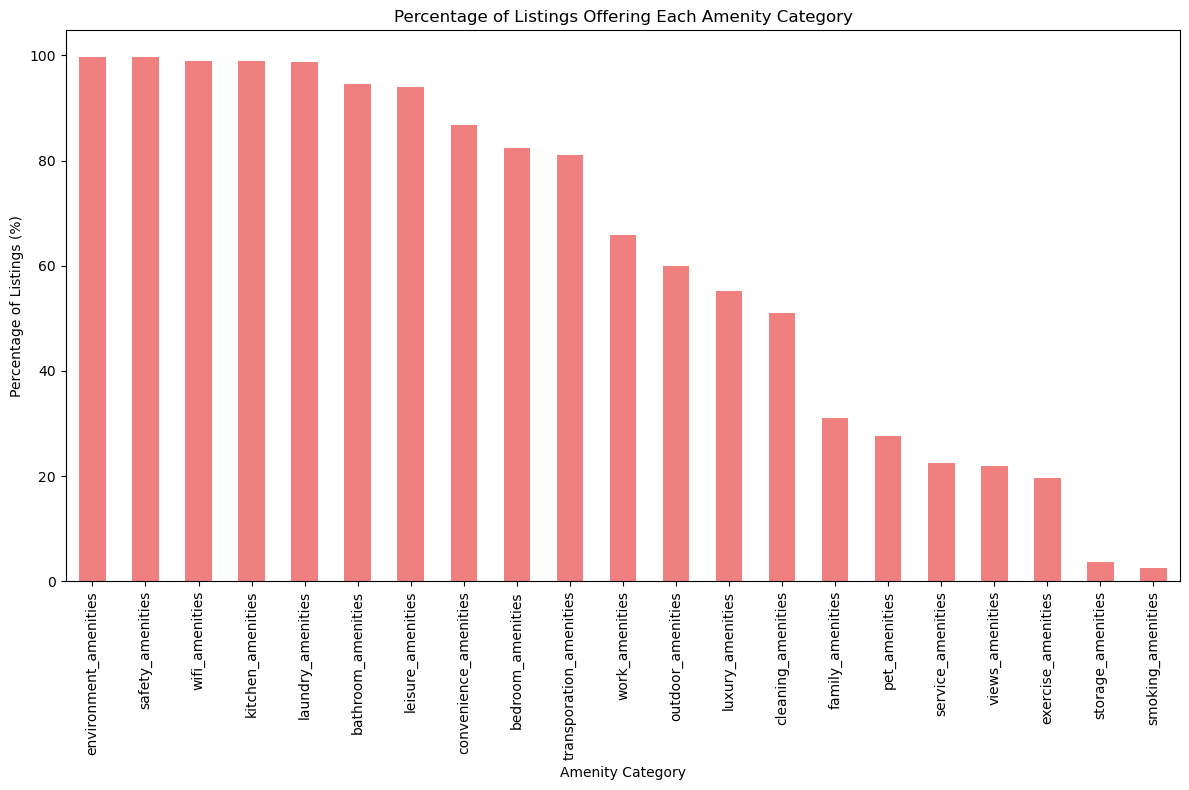

In [89]:
#| echo: false
amenities_count = listings_nooutlier.iloc[:, listings_nooutlier.columns.get_loc('wifi_amenities'):listings_nooutlier.columns.get_loc('work_amenities') + 1].sum().sort_values(ascending=False)

amenity_categories = list(amenities_count.index)

percentages = listings_nooutlier[amenity_categories].mean() * 100
sorted_percentages = percentages.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sorted_percentages.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Listings Offering Each Amenity Category')
plt.xlabel('Amenity Category')
plt.ylabel('Percentage of Listings (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From my second plot, I found that environmental_amenities, safety_amenities, wifi_amenities, kitchen_amenities, and laundry_amenities were offered nearly ubiquitously across all listings in the dataset. The high prevalence of these amenities suggest that most airbnb hosts in Chicago already offer them, and this might suggest that these amenities are considered essential in airbnbs. On the other hand, there are other amenity categories with a lower proportion of listings that offer them and tend to be relatively less commonly offered in airbnbs in Chicago.

Thus, my analysis and visualizations up to this point show that listings in Chicago that offer a greater variety of amenity categories are more likely to associated with prices higher than the median price, but that there are also some essential amenities and some selective amenties. This motivated the question then, out of the less common amenity cateogires, which ones should the host prioritize offering to maximize their revenue increase?

Therefore, for my third visualization, I examined the average price increase relative to the mean price that is associated with offering a specific amenity category. I thought that showing the achievable average increase in price after offering an amenity category would add value to analyzing my EDA question of association of amenities to prices, as well as to solving the larger problem of what amenities hosts should offer to earn a higher revenue from their listing.

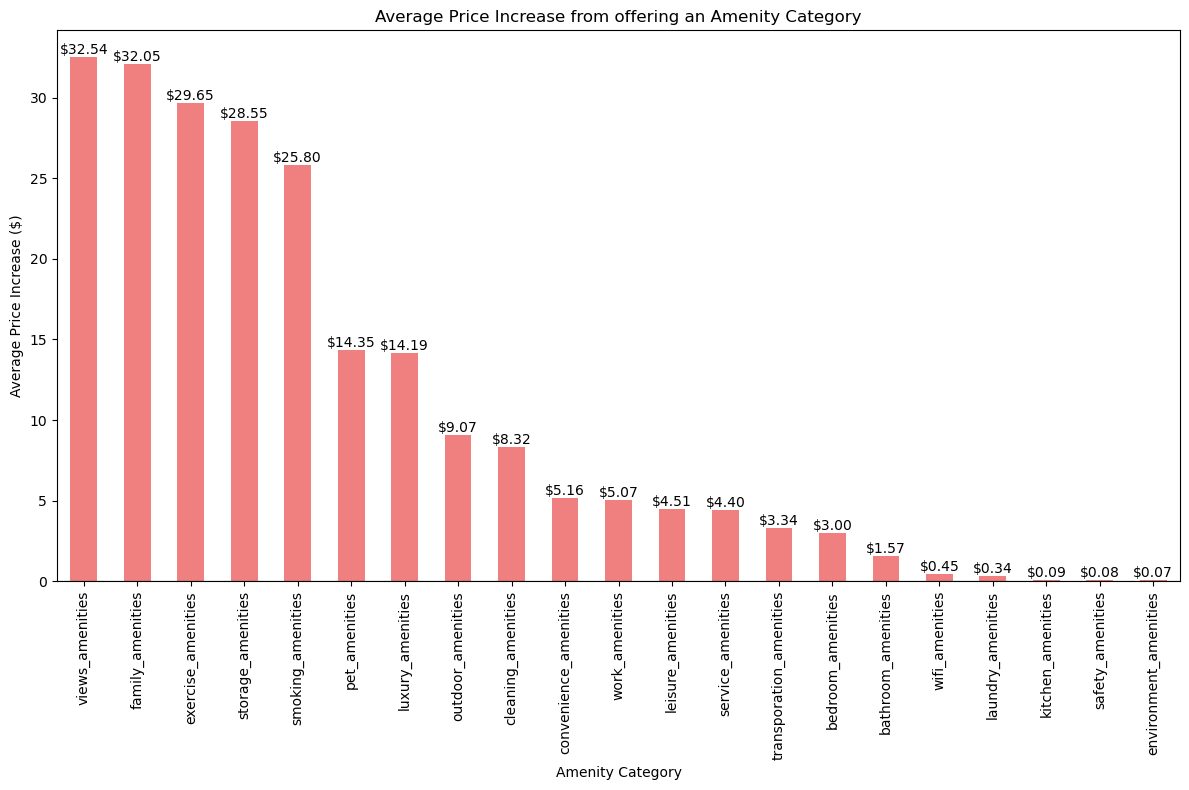

In [90]:
#| echo: false

overall_average_price = listings_nooutlier['price'].mean()

# Dictionary to store the price differential for each amenity
price_differential = {}

# Iterate over each amenity category to calculate the average price and price differential
for amenity_category in amenity_categories:
    has_amenity = listings_nooutlier[listings_nooutlier[amenity_category] == 1]['price'].mean()
    price_differential[amenity_category] = has_amenity - overall_average_price

sorted_differential = pd.Series(price_differential).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sorted_differential.plot(kind='bar', color='lightcoral', ax=ax)
ax.set_title('Average Price Increase from offering an Amenity Category')
ax.set_xlabel('Amenity Category')
ax.set_ylabel('Average Price Increase ($)')
ax.axhline(0, color='black', linewidth=0.8)

# Annotate bars with the value of the price differential
for i, v in enumerate(sorted_differential):
    ax.text(i, v if v > 0 else 0, f"${v:.2f}", color='black', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the plot, we see an interesting trend that offering the more prevalent, "essential" amenity categories identified from my second plot is associated with the smallest average price increase relative to the mean price of almost 0. On the other hand, out of the less commonly offered amenities, views_amenities and family_amenities are associated with the largest average price increase, followed by exercise_amenities and storiage amenities, at approximately ~$30 per night.

Analyzing the results from my visualizations collectively, my analysis suggests that it would be beneficial for the hosts from a price standpoint to offer more amenity categories than less, if feasible. In terms of considering the amenity categories and their associations with price, adding more amenities categories in order of the highest price increases from plot 3 would maximize the correlation of their listings with charging higher prices per night. As hosts add their amenity category offerings, they also should keep in mind that while association with higher prices does increase as more variety of amenity categories are offered, the majority of listings that offer 13 or more distinct amenity categories are associated with prices above the median.

I did not use any code repositories or other sources.

### Analysis 3
*By \<Name of person doing the analysis>*


### Analysis 4
*By \<Name of person doing the analysis>*

## Other sections

You are welcome to introduce additional sections or subsections, if required, to address your questions in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions

Do the individual analysis connect with each other to answer a bigger question? If yes, explain.

## Recommendations to stakeholder(s)
What are the action items for the stakeholder(s) based on your analysis? Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

Do the stakeholder(s) need to be aware about some limitations of your analysis? Can your analysis be directly used by the stakeholder(s) to obtain the expected benefit / make decisions, or do they need to do some further analysis based on their own, or do they need to repeat your analysis on a more recent data for the results to be applicable? 

#### Analysis 2

New hosts should first ensure that essential amenities (environmental controls, safety, wifi, kitchen amenities) are provided. Given that the essential amenities are offered, hosts should consider offering the most value-adding amenities (views, family-friendly, exercise, and storage) at an increased price point (~$30). Specifically, if hosts are already looking to add more amenity categories to their listings, offering 13 or more distinct categories seem to be more strongly associated with charging higher prices than offering 12 or less.

The hosts should be aware about some limitations of the analysis, such as that the recommendations are based on broadly defined amenity categories and does not always recommend specifically which item within the amenity category they should offer (e.g. differentiate between lake view and beach view). However, the analysis can still be directly used by hosts in Chicago to obtain the expected revenue benefit of around $30 per night, especially if their listings have entire amenity categories that are not yet offered.

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.